In [1]:
#preliminary work 
#read data

df <- read.csv("C:/Users/Admin/Downloads/progresa (1).csv")
head(df)

#omit NA
progresa = na.omit(df)

treatment,pri2000s,pri2000v,t2000,t2000r,pri1994,pan1994,prd1994,pri1994s,pri1994v,pan1994s,pan1994v,prd1994s,prd1994v,t1994,t1994r,votos1994,avgpoverty,pobtot1994,villages
1,40.82397,73.15436,55.80524,60.56911,102,3,23,45.75989,77.27273,1.345879,2.272727,10.3184067,17.424242,60.56456,67.00508,135,5.0,541,4
1,22.44186,73.52381,31.22093,50.28736,245,18,14,15.11538,65.68365,1.110518,4.825737,0.8637358,3.753351,23.81443,55.83832,386,5.0,3289,2
1,38.93130,87.03072,47.02290,42.52540,52,8,4,7.98857,50.98039,1.229011,7.843137,0.6145054,3.921569,21.66131,35.54007,141,4.5,1320,2
1,31.16883,71.28713,45.02164,49.75369,58,6,7,29.16215,73.41772,3.016775,7.594937,3.5195705,8.860759,40.22366,56.83453,80,5.0,384,1
0,76.92308,78.94737,100.00000,48.40764,30,0,38,20.17038,43.47826,0.000000,0.000000,25.5491525,55.072464,46.39188,48.59155,69,5.0,307,1
0,23.85321,65.40881,37.38532,34.79212,128,0,20,32.81974,51.82186,0.000000,0.000000,5.1280838,8.097166,63.33183,68.61111,247,5.0,840,6


In [23]:
# split the dataset into treatment and non-treatment groups
treat <- subset(progresa, treatment == "1")
no_treat <- subset(progresa, treatment == "0")


In [27]:
#part 1L histograms 

poverty_treat <- treat[['avgpoverty']]  #average poverty index
poverty_no_treat <- no_treat[['avgpoverty']]

mean(poverty_treat)
mean(poverty_no_treat)


ptr_treat <- treat[['t2000']] #previous turnout rate (share of the population)
ptr_no_treat <- no_treat[['t2000']]

mean(ptr_treat)
mean(ptr_no_treat)

pri_treat <- treat[['pri2000s']] #previous PRI support rate (share of population).
pri_no_treat <- no_treat[['pri2000s']]

mean(pri_treat)
mean(pri_no_treat)

#min(poverty_treat)
#max(poverty_treat)

#min(poverty_no_treat)
#max(poverty_no_treat)

#min(ptr_treat)
#max(ptr_treat)

#min(ptr_no_treat)
#max(ptr_no_treat)

#min(pri_treat)
#max(pri_treat)

#min(pri_no_treat)
#max(pri_no_treat)



[1] 4.573477

[1] 4.588835

[1] 68.06822

[1] 63.81483

[1] 38.15451

[1] 34.48895

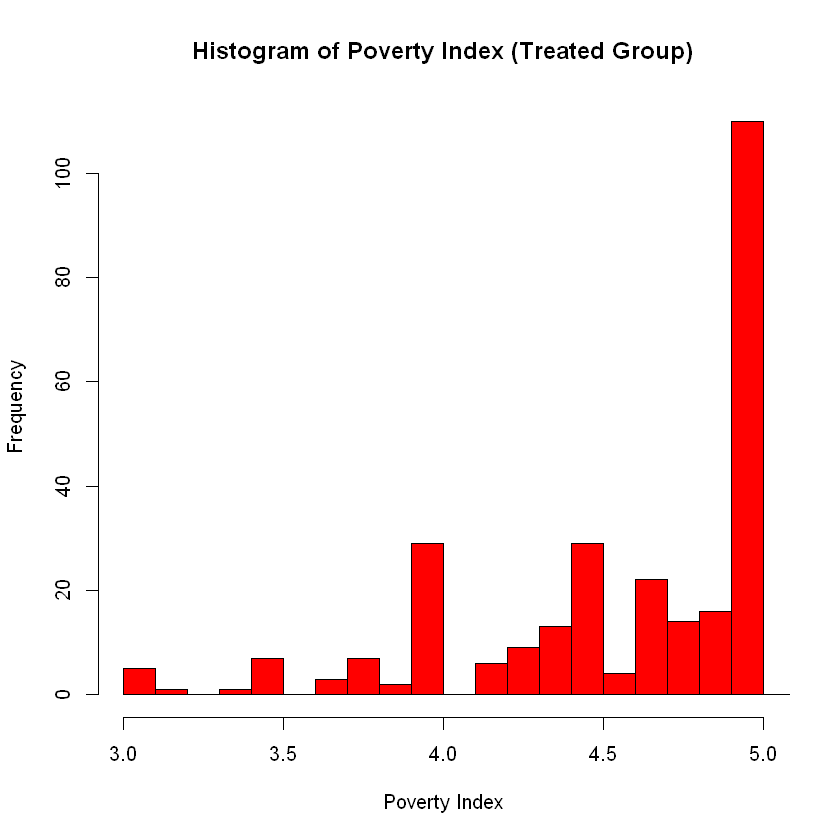

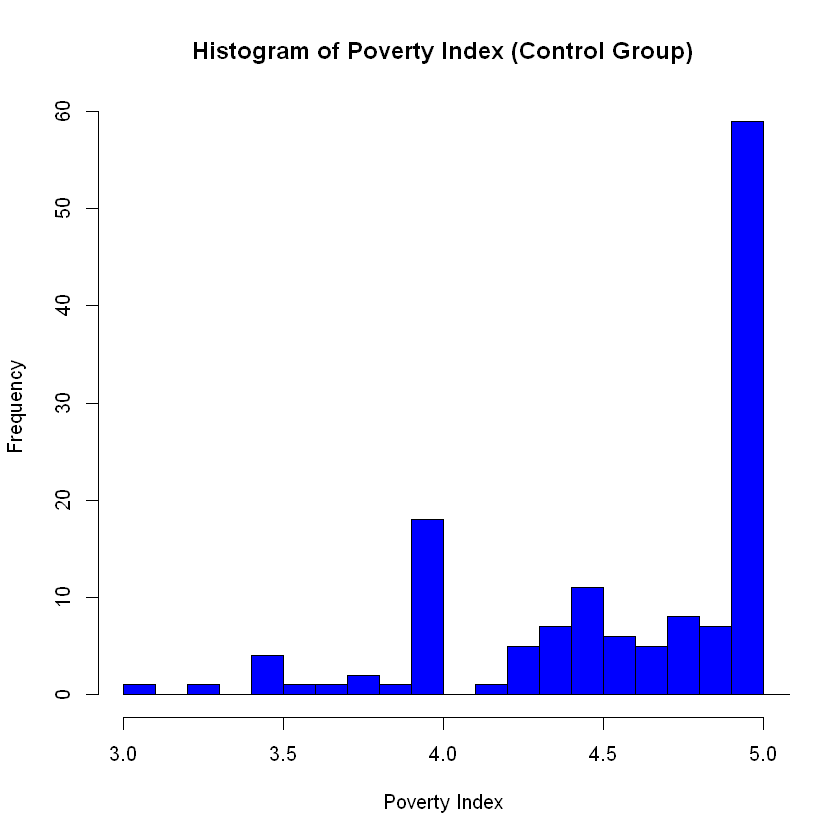

In [5]:

# Histogram of poverty_treat
hist(poverty_treat, main = "Histogram of Poverty Index (Treated Group)", xlab = "Poverty Index",xlim = c(3, 5), col = "red",breaks = seq(min(poverty_treat), max(poverty_treat) + 0.2, by = 0.1))

# Histogram of poverty_no_treat
hist(poverty_no_treat, main = "Histogram of Poverty Index (Control Group)", xlab = "Poverty Index",xlim = c(3, 5), col = "blue",breaks = seq(min(poverty_no_treat), max(poverty_no_treat) + 0.2, by = 0.1))



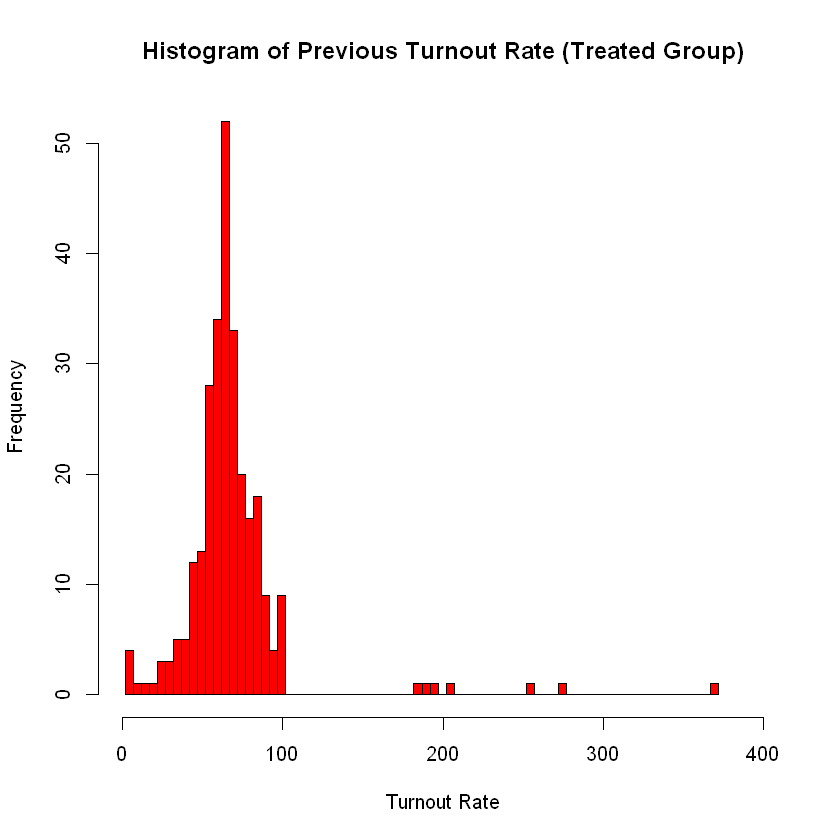

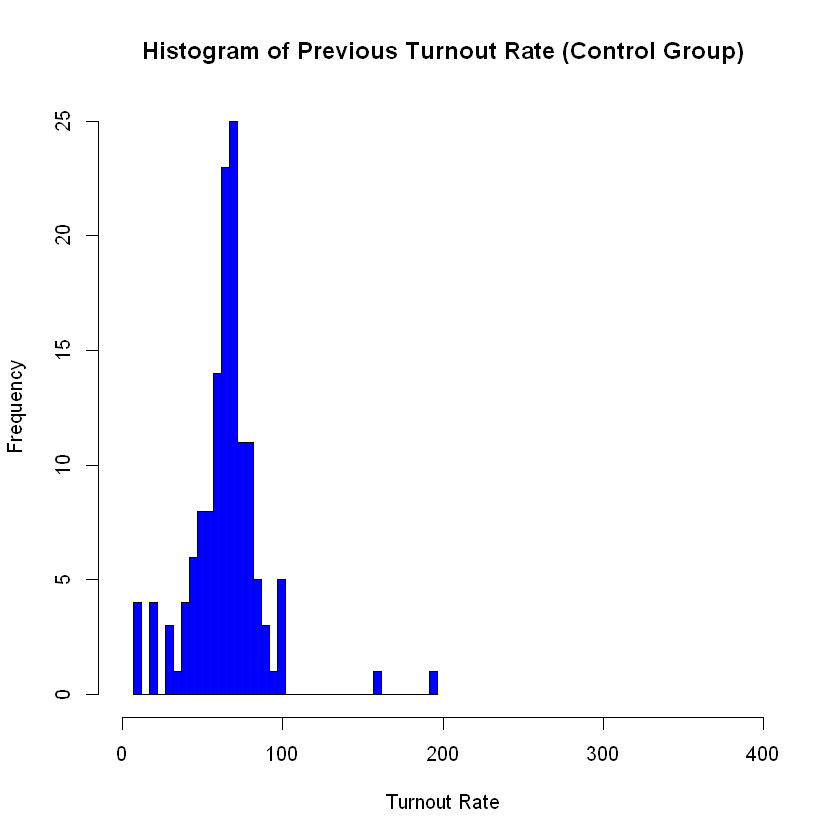

In [6]:
# Histogram of ptr_treat
hist(ptr_treat, main = "Histogram of Previous Turnout Rate (Treated Group)", xlab = "Turnout Rate",xlim = c(1, 400), col = "red",breaks = seq(min(ptr_treat), max(ptr_treat) + 1, by = 5))

# Histogram of ptr_no_treat
hist(ptr_no_treat, main = "Histogram of Previous Turnout Rate (Control Group)", xlab = "Turnout Rate",xlim = c(1, 400), col = "blue",breaks = seq(min(ptr_no_treat), max(ptr_no_treat) + 1, by = 5))



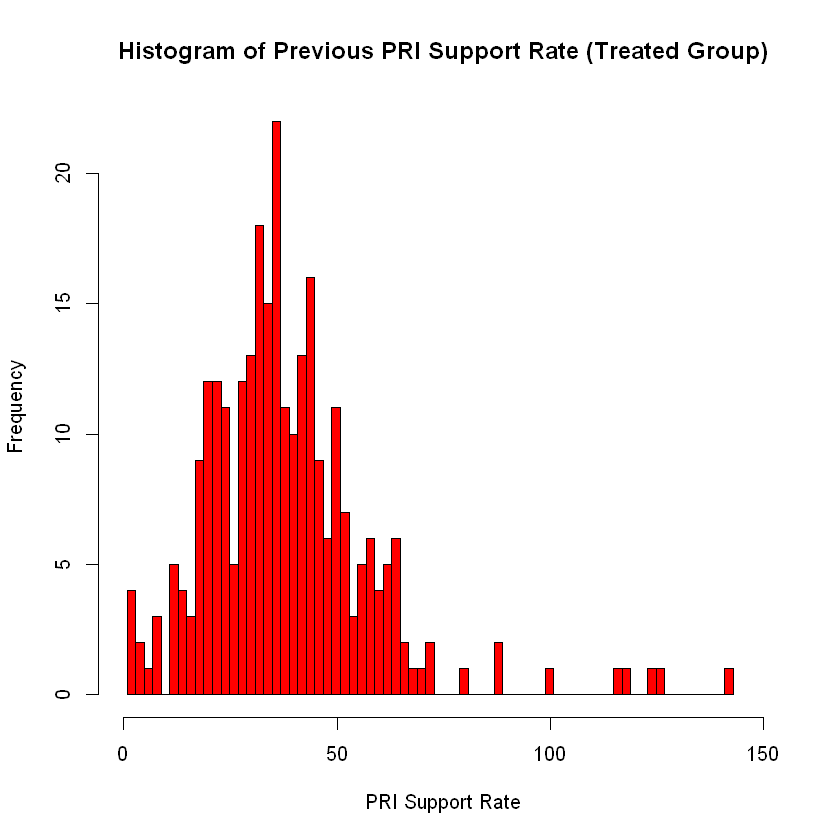

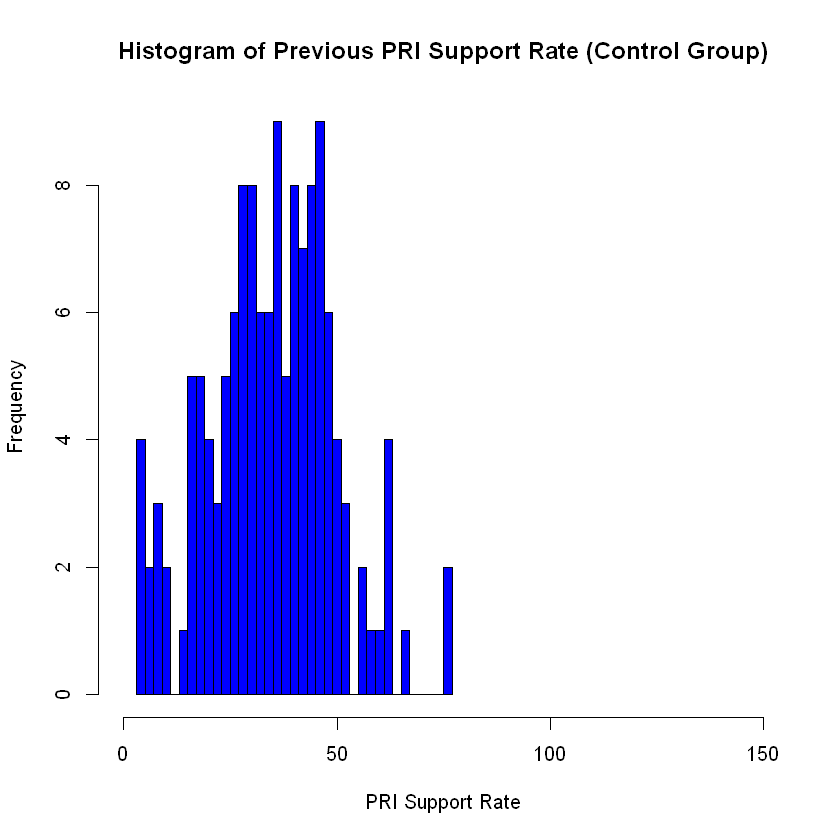

In [7]:
# Histogram of pri_treat
hist(pri_treat, main = "Histogram of Previous PRI Support Rate (Treated Group)", xlab = "PRI Support Rate",xlim = c(0, 150), col = "red",breaks = seq(min(pri_treat), max(pri_treat) + 1, by = 2))

# Histogram of pri_no_treat
hist(pri_no_treat, main = "Histogram of Previous PRI Support Rate (Control Group)", xlab = "PRI Support Rate",xlim = c(0, 150), col = "blue",breaks = seq(min(pri_no_treat), max(pri_no_treat) + 1, by = 2))




In [8]:
#part 2 run regression 

model1 <- lm(t2000r ~ treatment + avgpoverty +  log(pobtot1994) +
t1994r + pri1994v + pan1994v+ prd1994,
data = progresa)
summary(model1)

model2 <- lm(pri2000v ~ treatment + avgpoverty +  log(pobtot1994) +
t1994r + pri1994v + pan1994v+ prd1994,
data = progresa)
summary(model2)




Call:
lm(formula = t2000r ~ treatment + avgpoverty + log(pobtot1994) + 
    t1994r + pri1994v + pan1994v + prd1994, data = progresa)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.006  -4.728  -0.035   4.869  28.839 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     41.686112   7.218763   5.775 1.53e-08 ***
treatment       -1.114710   0.817827  -1.363 0.173629    
avgpoverty      -0.251473   0.894900  -0.281 0.778848    
log(pobtot1994) -0.668774   0.516456  -1.295 0.196077    
t1994r           0.221483   0.031340   7.067 6.89e-12 ***
pri1994v         0.067370   0.033531   2.009 0.045175 *  
pan1994v         0.212120   0.054835   3.868 0.000128 ***
prd1994          0.013452   0.008212   1.638 0.102157    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.806 on 408 degrees of freedom
Multiple R-squared:  0.1786,	Adjusted R-squared:  0.1646 
F-statistic: 12.68 on 7 and 408 DF,  p-value: 9.566e


Call:
lm(formula = pri2000v ~ treatment + avgpoverty + log(pobtot1994) + 
    t1994r + pri1994v + pan1994v + prd1994, data = progresa)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.408  -7.648   0.599   7.950  33.020 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     34.69950   11.71229   2.963  0.00323 ** 
treatment        0.87742    1.32691   0.661  0.50883    
avgpoverty       2.89820    1.45196   1.996  0.04659 *  
log(pobtot1994) -1.45615    0.83794  -1.738  0.08301 .  
t1994r          -0.07449    0.05085  -1.465  0.14370    
pri1994v         0.44265    0.05440   8.137 4.96e-15 ***
pan1994v        -0.40133    0.08897  -4.511 8.45e-06 ***
prd1994         -0.04107    0.01332  -3.083  0.00219 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.66 on 408 degrees of freedom
Multiple R-squared:  0.4873,	Adjusted R-squared:  0.4785 
F-statistic: 55.39 on 7 and 408 DF,  p-value: < 2.2e-16


In [38]:
#part 3 confidence intervals 


sim = function(object = lm1, n.sims=100){
    summ <- summary (object)
    coef <- summ$coef[,1:2,drop=FALSE]
    dimnames(coef)[[2]] <- c("coef.est","coef.sd")
    sigma.hat <- summ$sigma
    beta.hat <- coef[,1,drop = FALSE]
    V.beta <- summ$cov.unscaled
    n <- summ$df[1] + summ$df[2]
    k <- summ$df[1]
    sigma <- rep (NA, n.sims)
    beta <- array (NA, c(n.sims,k))
    dimnames(beta) <- list (NULL, rownames(beta.hat))
    for (s in 1:n.sims){
        sigma[s] <- sigma.hat*sqrt((n-k)/rchisq(1,n-k))
        beta[s,] <- MASS::mvrnorm (1, beta.hat, V.beta*sigma[s]^2)
    }
    ans <- list(coef = beta,
                sigma = sigma)
    return (ans)
}

#the code is taken from session 5 cs130 

In [30]:
model1_simulated <- sim(model1,n.sims=1000)
total_result0 <- model1_simulated$coef
total_result <- total_result0[,-1]
treatment_result <- total_result[,1]
avgpoverty_result <- total_result[,2]
pobtot1994_result <- total_result[,3]
t1994r_result <- total_result[,4]
pri1994v_result <- total_result[,5]
pan1994v_result <- total_result[,6]
prd1994_result <- total_result[,7]



In [31]:

# Select the row with index 92
row92 <- progresa[92, ]
row92


,treatment,pri2000s,pri2000v,t2000,t2000r,pri1994,pan1994,prd1994,pri1994s,pri1994v,...,prd1994s,prd1994v,t1994,t1994r,votos1994,avgpoverty,pobtot1994,villages,ind,interaction
93,0,51.92308,79.88166,69.80769,68.14516,219,5,13,51.89127,90.12346,...,3.080304,5.349794,67.29279,66.57534,284,5,940,2,0,0


In [32]:
expected_outcomes <-list()
#without error 
for (i in 1:nrow(total_result)) {
    row_values <- total_result[i]
    individual_outcome <-(treatment_result[i]*0+ avgpoverty_result[i]*5 + pobtot1994_result[i]*log(940) + t1994r_result[i]*67.2927 + pri1994v_result[i]*90.12346 + pan1994v_result[i]*2.057613 + prd1994_result[i]* 5.349794)
    expected_outcomes[[i]] <- individual_outcome
}




In [33]:
#introducing error term 
set.seed(123)
error_term <- rnorm(100,mean =2,sd=1)
predicted_outcomes <-list()
for (i in 1:nrow(total_result)) {
    row_values <- total_result[i]
    individual_outcome <-(treatment_result[i]*0+ avgpoverty_result[i]*5 + pobtot1994_result[i]*log(940) + t1994r_result[i]*67.2927 + pri1994v_result[i]*90.12346 + pan1994v_result[i]*2.057613 + prd1994_result[i]* 5.349794+error_term)
    predicted_outcomes[[i]] <- individual_outcome
}




In [39]:
#computing confidence intervals 

expected <-unlist(expected_outcomes)
interval<- quantile(expected, c(0.025, 0.975))
interval


2.5%      97.5% 
 0.6538989 30.0738172

In [40]:

predicted <-unlist(predicted_outcomes)
interval<- quantile(predicted, c(0.025, 0.975))
interval

2.5%    97.5% 
 2.74727 32.60784

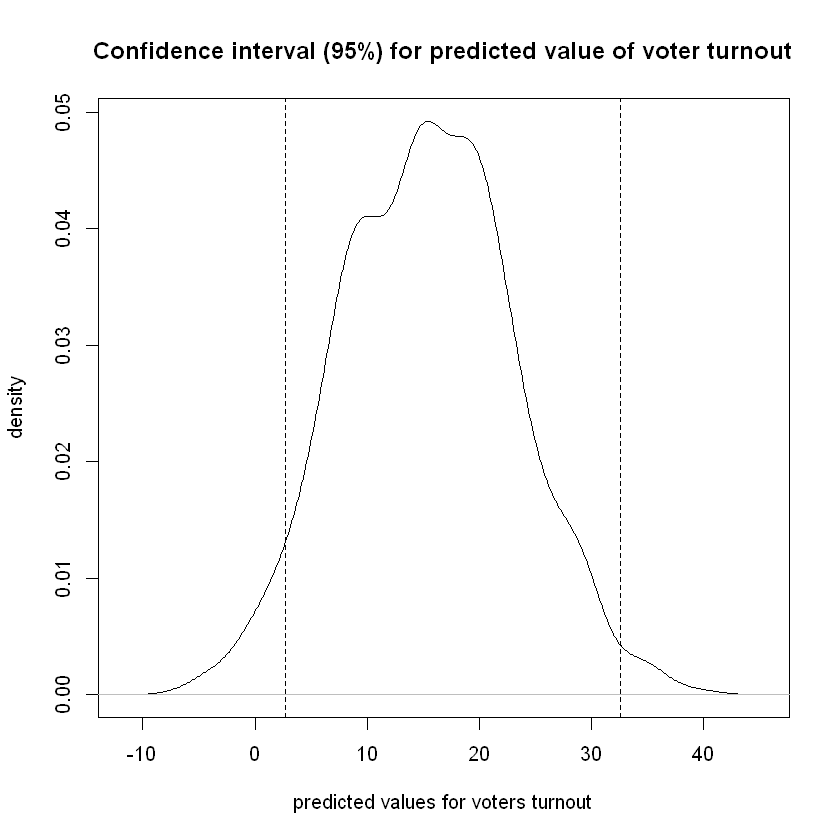

In [41]:
#plotting 

plot(density(expected),xlab = "predicted values for voters turnout", ylab = "density",main = "Confidence interval (95%) for predicted value of voter turnout")
abline(v=interval[1],lty = 2)
abline(v=interval[2],lty = 2)

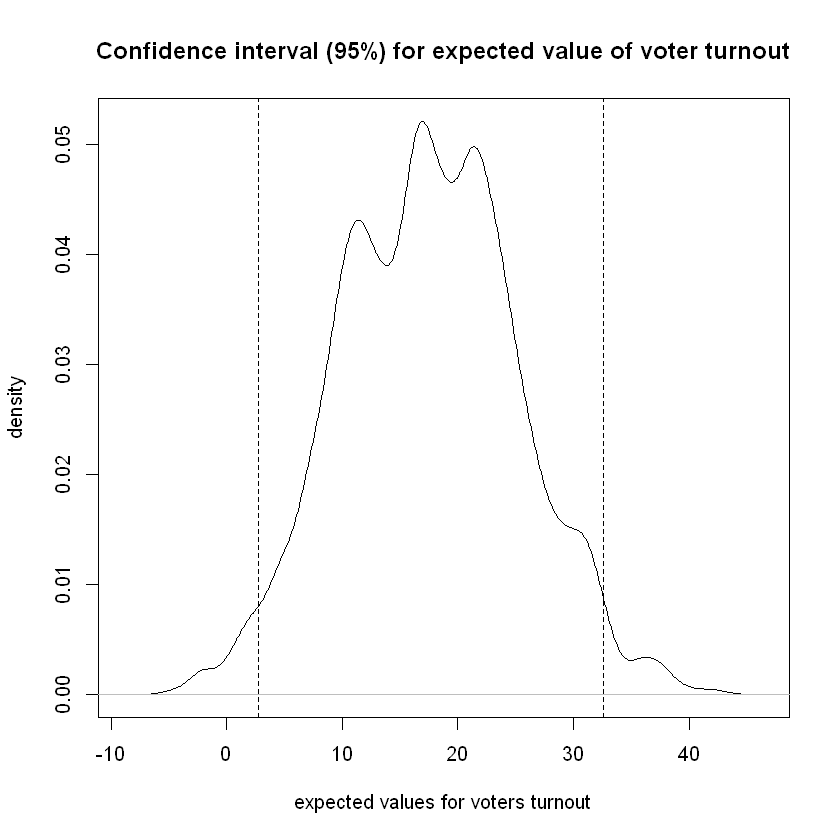

In [37]:
plot(density(predicted),xlab = "expected values for voters turnout", ylab = "density",main = "Confidence interval (95%) for expected value of voter turnout")
abline(v=interval[1],lty = 2)
abline(v=interval[2],lty = 2)

In [46]:

#part 4 interaction term 

#Create the indicator variable
progresa$ind <- ifelse(progresa$prd1994v > 50, 1, 0) 

#make interaction term 
progresa$interaction <- progresa$prd1994v * progresa$ind

model_interaction <- lm(t2000r ~ treatment + avgpoverty + pobtot1994 +
              t1994r + pri1994v + pan1994v + prd1994 + interaction,
            data = progresa)

summary(model_interaction)


Call:
lm(formula = t2000r ~ treatment + avgpoverty + pobtot1994 + t1994r + 
    pri1994v + pan1994v + prd1994 + interaction, data = progresa)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.404  -4.526   0.099   4.955  29.213 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.685e+01  6.184e+00   5.958 5.53e-09 ***
treatment   -1.008e+00  8.163e-01  -1.234 0.217755    
avgpoverty  -3.201e-01  9.139e-01  -0.350 0.726307    
pobtot1994  -5.981e-05  5.832e-05  -1.026 0.305714    
t1994r       2.277e-01  3.060e-02   7.440 6.04e-13 ***
pri1994v     7.160e-02  3.644e-02   1.965 0.050082 .  
pan1994v     2.107e-01  5.583e-02   3.774 0.000185 ***
prd1994      9.293e-03  7.613e-03   1.221 0.222956    
interaction  2.303e-02  3.292e-02   0.700 0.484573    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.816 on 407 degrees of freedom
Multiple R-squared:  0.1784,	Adjusted R-squared:  0.1623 
F-statistic: 11

In [101]:
model_interaction.sim = sim(model_interaction, n.sims = 1000)

slopes <- model_interaction.sim[[1]][, 4]
intercepts <- model_interaction.sim[[1]][, 2]

mean(slopes)
mean(intercepts)

all_coefs <- model_interaction.sim$coef
#select treatment coefficients 
treatment_coefs <- all_coefs[,c('treatment')]

p.value <- mean(treatment_coefs < 0) + mean(treatment_coefs > 0)

cat("The p-value for the treatment effect is", round(p.value, 3), "\n")




[1] -5.984414e-05

[1] -0.9925807

The p-value for the treatment effect is 1 


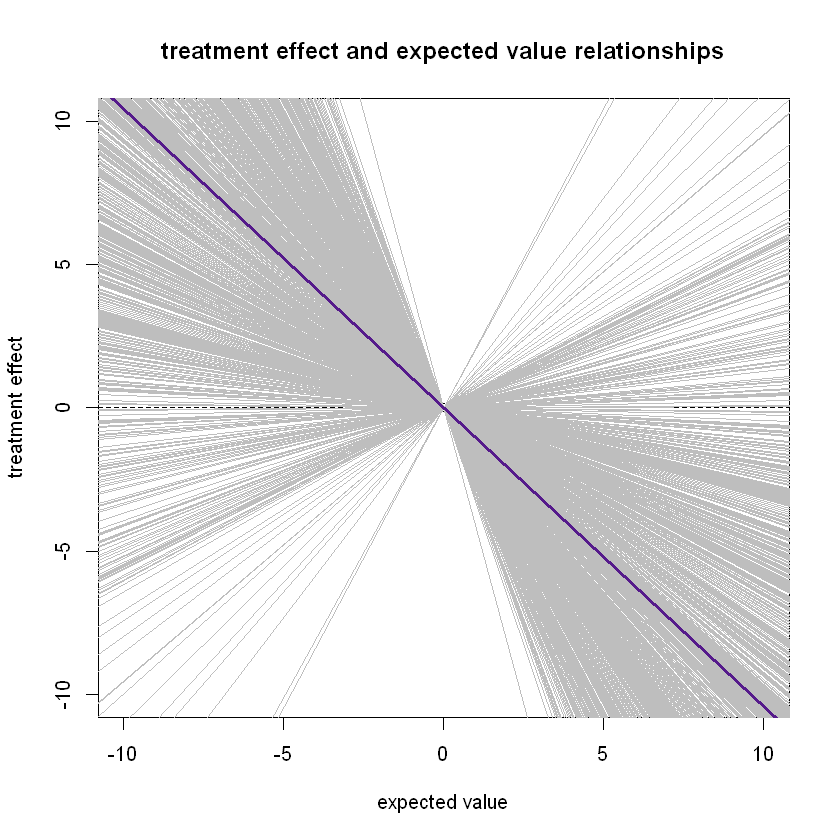

In [84]:

plot (0, 0, xlim=c(-10, 10), ylim=c(-10,10),
      xlab="expected value", ylab="treatment effect",
      main="treatment effect and expected value relationships")

abline (h = 0, lwd=.5, lty=2) # draws a horizontal line


for (i in 1:1000) {
    abline (a = slopes[i], b = intercepts[i],
            lwd = .5, col = "gray")
}


abline (a = mean(slopes),
        b = mean(intercepts),
        lwd = 3, col = "purple4")


#code is taken from sesion 3.2 cs130

In [53]:
#part 5
# Create the interaction term
progresa$treatmentpoverty <- progresa$treatment * progresa$avgpoverty


RegressionModel1 <- lm(t2000r ~ treatment + avgpoverty + treatmentpoverty + pobtot1994 +
t1994r + pri1994v + pan1994v+ prd1994 + interaction,
data = progresa)

summary(RegressionModel1)


residuals <- round(predict(RegressionModel1)) - progresa$t2000r
cat("\nRMSE = ", mean(residuals^2))





Call:
lm(formula = t2000r ~ treatment + avgpoverty + treatmentpoverty + 
    pobtot1994 + t1994r + pri1994v + pan1994v + prd1994 + interaction, 
    data = progresa)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.639  -4.517  -0.026   4.835  29.023 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.142e+01  8.253e+00   5.019 7.78e-07 ***
treatment        -7.618e+00  7.933e+00  -0.960 0.337473    
avgpoverty       -1.288e+00  1.473e+00  -0.874 0.382537    
treatmentpoverty  1.442e+00  1.721e+00   0.838 0.402669    
pobtot1994       -5.374e-05  5.878e-05  -0.914 0.361156    
t1994r            2.280e-01  3.062e-02   7.446 5.83e-13 ***
pri1994v          6.983e-02  3.651e-02   1.913 0.056509 .  
pan1994v          2.073e-01  5.601e-02   3.700 0.000245 ***
prd1994           9.197e-03  7.617e-03   1.207 0.227953    
interaction       2.117e-02  3.301e-02   0.641 0.521653    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' '


RMSE =  59.52462

In [54]:
# Get the variance-covariance matrix
vcov_mat <- vcov(RegressionModel1)

# Define the coefficients of the linear combination
a <- 1
b <- 2
c <- -1

# Calculate the LCOV
l_cov <- a^2 * vcov_mat[2,2] + b^2 * vcov_mat[3,3] + c^2 * vcov_mat[4,4] +
         2*a*b*vcov_mat[2,3] + 2*a*c*vcov_mat[2,4] + 2*b*c*vcov_mat[3,4]

# Print the result
l_cov
#code was adopted from chat gpt

[1] 146.2081

In [55]:
# Create the interaction term
progresa$treatmentpovertysqr <- progresa$treatment * progresa$avgpoverty^2


RegressionModel2 <- lm(t2000r ~ treatment+ avgpoverty + treatmentpovertysqr + pobtot1994 +
t1994r + pri1994v + pan1994v+ prd1994 + interaction,
data = progresa)

summary(RegressionModel2)

residuals <- round(predict(RegressionModel2)) - progresa$t2000r
cat("\nRMSE =", mean(residuals^2))



Call:
lm(formula = t2000r ~ treatment + avgpoverty + treatmentpovertysqr + 
    pobtot1994 + t1994r + pri1994v + pan1994v + prd1994 + interaction, 
    data = progresa)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.648  -4.511   0.000   4.848  29.008 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.114e+01  8.259e+00   4.982 9.35e-07 ***
treatment           -4.320e+00  4.295e+00  -1.006 0.315041    
avgpoverty          -1.227e+00  1.473e+00  -0.833 0.405159    
treatmentpovertysqr  1.558e-01  1.983e-01   0.786 0.432521    
pobtot1994          -5.633e-05  5.851e-05  -0.963 0.336240    
t1994r               2.279e-01  3.062e-02   7.444 5.91e-13 ***
pri1994v             6.993e-02  3.651e-02   1.915 0.056173 .  
pan1994v             2.073e-01  5.603e-02   3.699 0.000246 ***
prd1994              9.212e-03  7.618e-03   1.209 0.227256    
interaction          2.125e-02  3.302e-02   0.644 0.520121    
---
Signif. codes:  0 '***' 


RMSE = 59.56975

In [56]:
# Get the variance-covariance matrix
vcov_mat <- vcov(RegressionModel2)

# Define the coefficients of the linear combination
a <- 1
b <- 2
c <- -1

# Calculate the LCOV
l_cov <- a^2 * vcov_mat[2,2] + b^2 * vcov_mat[3,3] + c^2 * vcov_mat[4,4] +
         2*a*b*vcov_mat[2,3] + 2*a*c*vcov_mat[2,4] + 2*b*c*vcov_mat[3,4]

# Print the result
l_cov
#code was adopted from chat gpt

[1] 49.30259